# **Import Libraries**

In [1]:
# DataFrame manipulation
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier  # Machine learning model
from sklearn.feature_selection import SelectKBest, f_classif  # Feature selection methods
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Scalers for normalization
from sklearn.model_selection import train_test_split, GridSearchCV  # Model training and hyperparameter tuning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Model evaluation metrics

# **Load Dataset**

In [2]:
# Load the dataset from the provided GitHub URL
url = 'https://raw.githubusercontent.com/kahiji052/Data-Engineer-Academy-Xideral-2025/refs/heads/main/4th%20week/meteorological-data-analysis/transformed_weather_data.csv'
df = pd.read_csv(url)

# **Data Exploration**

In [3]:
# Basic data exploration: display first/last rows, data types, null values, and duplicates

print('First rows of the DataFrame:')
print(df.head())

print('\nLast rows of the DataFrame:')
print(df.tail())

print('\nData types of each column:')
print(df.dtypes)

print('\nNull values per column:')
print(df.isnull().sum())

print('\nNumber of duplicated rows:')
print(df.duplicated().sum())

print('\nDescriptive statistics of the DataFrame:')
print(df.describe())

First rows of the DataFrame:
         date  temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0  2020-01-01                24.7                 6.4                 15.0   
1  2020-01-02                21.9                10.4                 15.2   
2  2020-01-03                23.8                 6.7                 14.2   
3  2020-01-04                17.7                 5.8                 10.4   
4  2020-01-05                21.7                 4.9                 11.8   

   rain_sum  precipitation_hours  wind_speed_10m_max  shortwave_radiation_sum  \
0       0.0                  0.0                18.2                    19.36   
1       0.0                  0.0                19.8                    18.18   
2       0.0                  0.0                16.6                    18.19   
3       0.0                  0.0                20.2                    18.17   
4       0.0                  0.0                11.3                    19.99   

   id  
0   0  

# **Data Cleaning and Renaming Columns**

In [4]:
df.rename(columns={
    'date': 'Date',
    'temperature_2m_max': 'Max_Temperature',
    'temperature_2m_min': 'Min_Temperature',
    'temperature_2m_mean': 'Mean_Temperature',
    'rain_sum': 'Total_Rain',
    'precipitation_hours': 'Precipitation_Hours',
    'wind_speed_10m_max': 'Max_Wind_Speed',
    'shortwave_radiation_sum': 'Solar_Radiation',
    'id': 'ID'
}, inplace=True)

In [5]:
df.drop(columns=['ID'], inplace=True) # dropping unnecessary column

# **Data Transformation**
Transforming data into meaningful classes based on certain thresholds for each variable.

In [6]:
# Rain class
df['Rain_Class'] = df['Total_Rain'].apply(lambda x: 1 if x > 0 else 0)

In [7]:
# Radiation class
def classify_radiation(radiation):
    if radiation > 20:
        return 'High'
    elif 5 <= radiation <= 20:
        return 'Moderate'
    else:
        return 'Low'

df['Radiation_Class'] = df['Solar_Radiation'].apply(classify_radiation)

In [8]:
# Wind class
def classify_wind_speed(wind_speed):
    if wind_speed > 25:
        return 'Strong winds'
    elif 10 <= wind_speed <= 25:
        return 'Wind with slight gusts'
    else:
        return 'No Wind'

df['Wind_Class'] = df['Max_Wind_Speed'].apply(classify_wind_speed)

In [9]:
# Temperature class
def classify_temperature(temp):
    if temp > 25:
        return 'High'
    elif 15 <= temp <= 25:
        return 'Moderate'
    else:
        return 'Low'

df['Temperature_Class'] = df['Mean_Temperature'].apply(classify_temperature)

In [10]:
# Shows the updated dataframe
df.head()

,Date,Max_Temperature,Min_Temperature,Mean_Temperature,Total_Rain,Precipitation_Hours,Max_Wind_Speed,Solar_Radiation,Rain_Class,Radiation_Class,Wind_Class,Temperature_Class
0,2020-01-01,24.7,6.4,15.0,0.0,0.0,18.2,19.36,0,Moderate,Wind with slight gusts,Moderate
1,2020-01-02,21.9,10.4,15.2,0.0,0.0,19.8,18.18,0,Moderate,Wind with slight gusts,Moderate
2,2020-01-03,23.8,6.7,14.2,0.0,0.0,16.6,18.19,0,Moderate,Wind with slight gusts,Low
3,2020-01-04,17.7,5.8,10.4,0.0,0.0,20.2,18.17,0,Moderate,Wind with slight gusts,Low
4,2020-01-05,21.7,4.9,11.8,0.0,0.0,11.3,19.99,0,Moderate,Wind with slight gusts,Low


# **Data Analysis**
Visualizing distributions and correlations of the meteorological variables

In [11]:
# Set style for plots
sns.set(style='whitegrid')
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

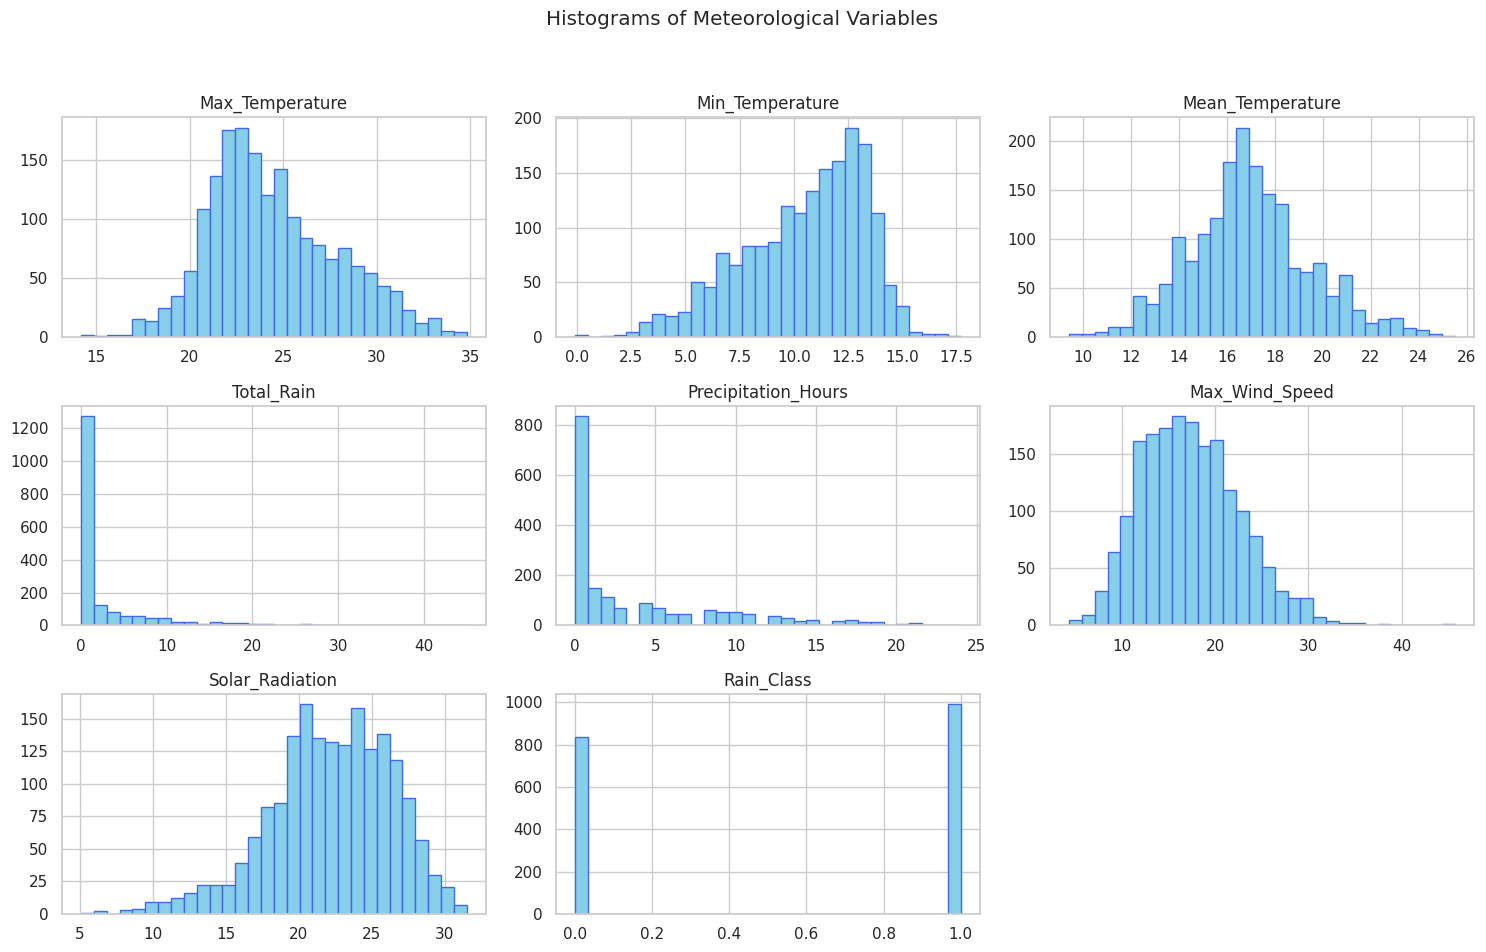

In [12]:
# Plot histograms to check the distribution of each meteorological variable
df.hist(bins=30, figsize=(15, 10), layout=(3, 3), edgecolor='royalblue', color='skyblue')
plt.suptitle('Histograms of Meteorological Variables')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

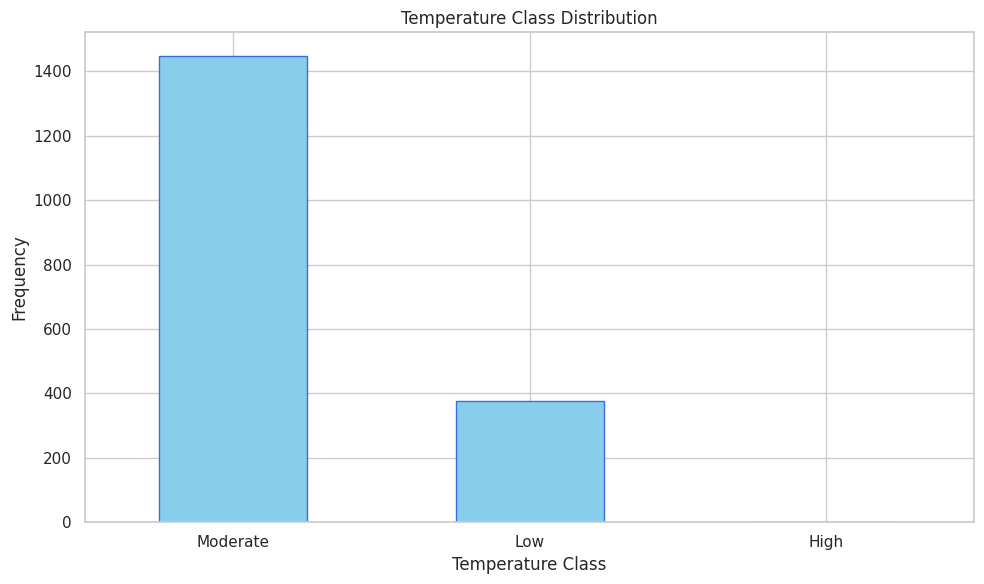

In [13]:
# Plot the distribution of the temperature classes
temperature_counts = df['Temperature_Class'].value_counts()
plt.figure(figsize=(10, 6))
temperature_counts.plot(kind='bar', color='skyblue', edgecolor='royalblue')
plt.title('Temperature Class Distribution')
plt.xlabel('Temperature Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

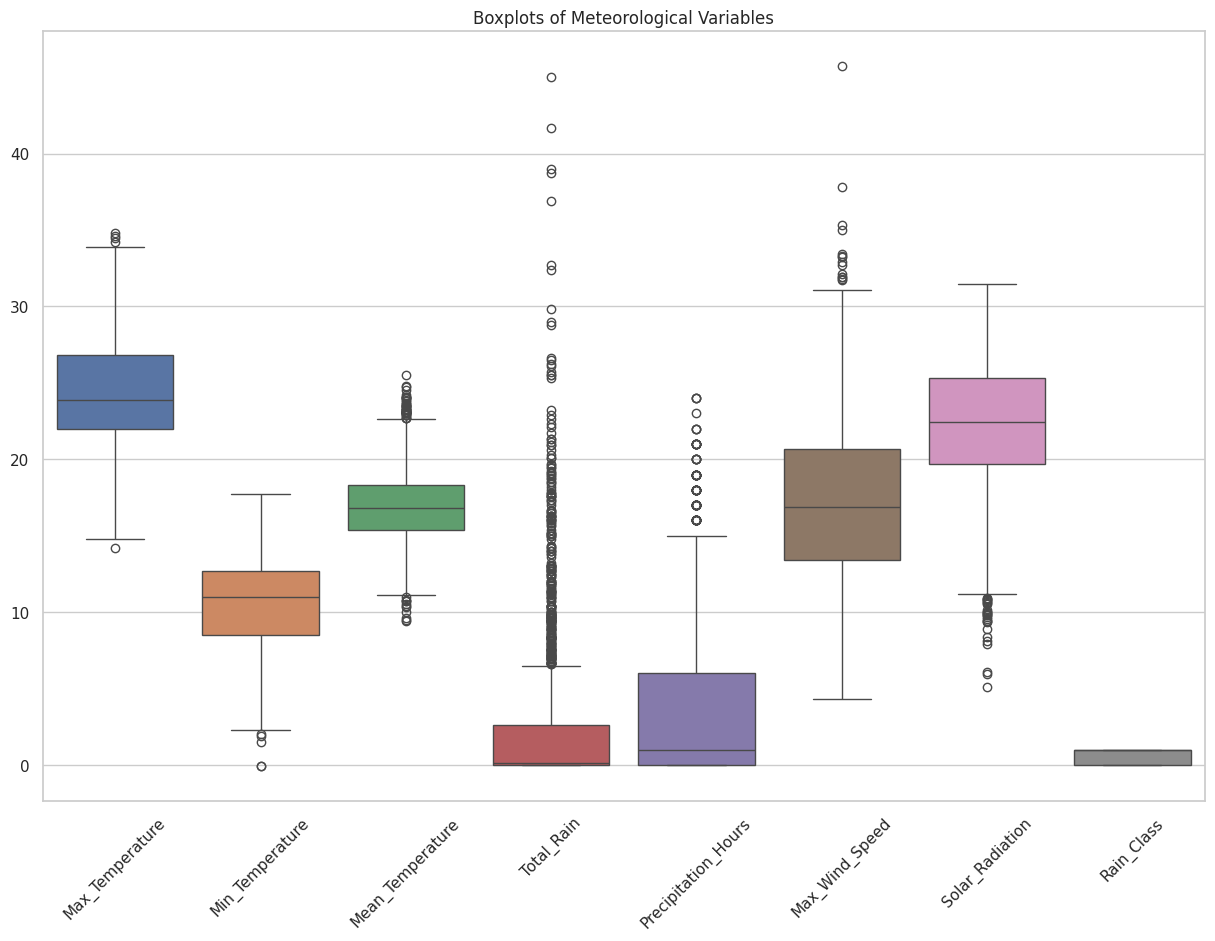

In [14]:
# Plot boxplots to visualize the spread and outliers of the variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplots of Meteorological Variables')
plt.xticks(rotation=45)
plt.show()

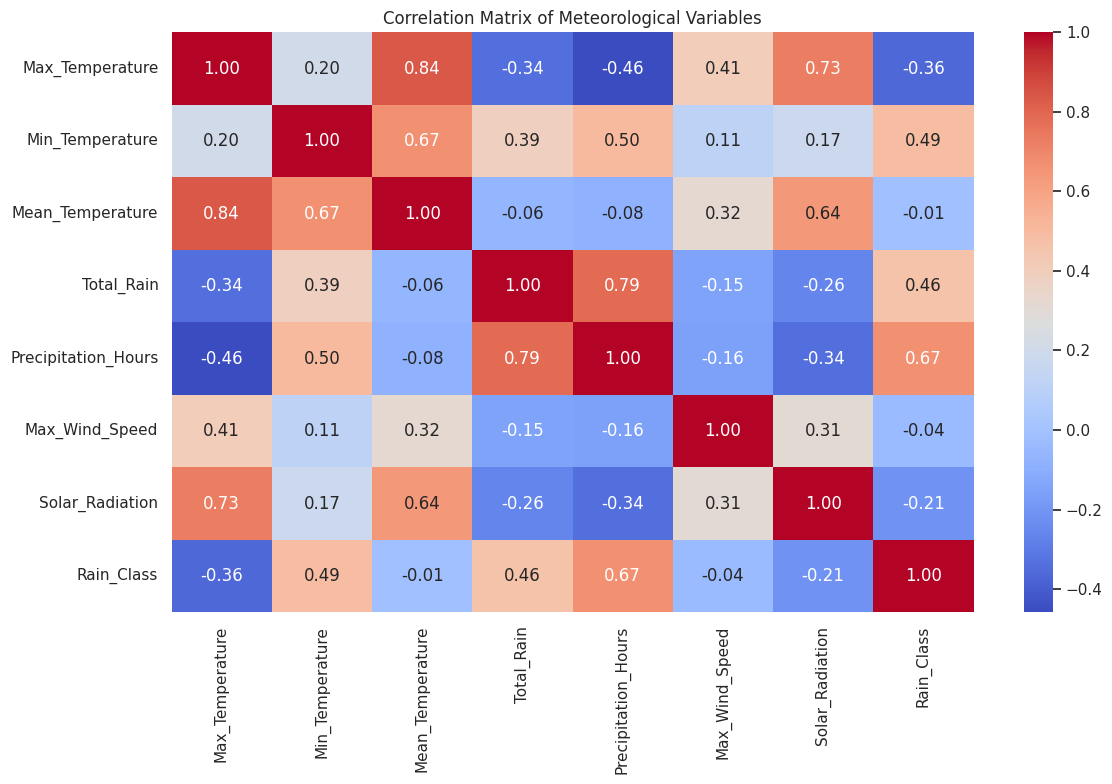

In [15]:
# Visualize correlation between numeric variables using a heatmap
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Meteorological Variables')
plt.tight_layout()
plt.show()

# **Scaling the Data**
Applying MinMaxScaler and StandardScaler to the numerical columns for normalization

In [16]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Apply MinMaxScaler
df_min_max_scaled = df.copy()
df_min_max_scaled[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# Apply StandardScaler
df_standard_scaled = df.copy()
df_standard_scaled[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

## **Feature Selection**

In [17]:
# Selecting the best features using SelectKBest for classification

predictors = ['Max_Temperature', 'Min_Temperature', 'Mean_Temperature', 'Total_Rain', 'Precipitation_Hours', 'Max_Wind_Speed']
target = 'Radiation_Class'

x = df[predictors]
y = df[target]

In [18]:
# Select the best 3 features using SelectKBest
k = 3
selector = SelectKBest(score_func=f_classif, k=k)
x_new = selector.fit_transform(x, y)

In [19]:
# Display selected features
selected_features = x.columns[selector.get_support()]
print('Selected features by SelectKBest:')
print(selected_features.tolist())

Selected features by SelectKBest:
['Max_Temperature', 'Mean_Temperature', 'Precipitation_Hours']


## **Machine Learning Model**

In [20]:
# Preprocess target labels: map 'High', 'Moderate', 'Low' to numeric values
y = df['Radiation_Class'].map({'High': 2, 'Moderate': 1, 'Low': 0})

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x[selected_features], y, test_size=0.2, random_state=42)

In [21]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predictions on the test set
y_pred = rf_model.predict(x_test)

In [22]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=True)
recall = recall_score(y_test, y_pred, average='macro', zero_division=True)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=True)

In [23]:
# Display evaluation metrics
print("Accuracy:", accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1-score (macro):", f1)

Accuracy: 0.8142076502732241
Precision (macro): 0.780501645670185
Recall (macro): 0.7646806839681577
F1-score (macro): 0.7716529653552555


## **Confusion Matrix**

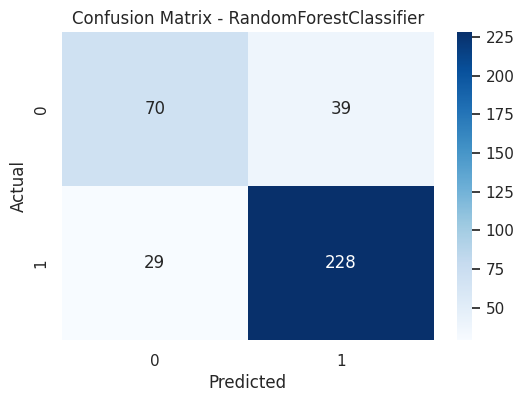

In [24]:
cm_rf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - RandomForestClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Hyperparameter Tuning**

In [25]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [26]:
# Display best parameters and re-train the model with them
print(f"Best parameters: {grid_search.best_params_}")

best_rf_model = grid_search.best_estimator_

best_rf_model.fit(x_train, y_train)

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [27]:
y_pred_best = best_rf_model.predict(x_test)

# Re-evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro', zero_division=True)
recall_best = recall_score(y_test, y_pred_best, average='macro', zero_division=True)
f1_best = f1_score(y_test, y_pred_best, average='macro', zero_division=True)

In [28]:
print("\nBest Model - Evaluation:")
print("Accuracy:", accuracy_best)
print("Precision (macro):", precision_best)
print("Recall (macro):", recall_best)
print("F1-score (macro):", f1_best)


Best Model - Evaluation:
Accuracy: 0.8224043715846995
Precision (macro): 0.7913493755711241
Recall (macro): 0.773158890515118
F1-score (macro): 0.7810904071773637
